In [1]:
import numpy as np 
import os, glob
import math
from math import log10, floor
from pathlib import Path
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
import matplotlib.font_manager as font_manager
import coronagraph as cg
from astropy.io import ascii 
from astropy.table import vstack, Table
import pandas as pd
from sigfig import round

In [2]:
os.chdir('/Users/schuylerraeschroerborges/Desktop/Second_Project/')

black=ascii.read("bestblackmat.txt", data_start=1, delimiter='\s')
bscrub=ascii.read("black_scrubbed.txt", data_start=0, delimiter='\s')
orange=ascii.read("bestorangemat.txt", data_start=1, delimiter='\s')
oscrub=ascii.read("orangemat_scrubbed.txt", data_start=0, delimiter='\s')
arthro=ascii.read("Arthrobacter.txt", data_start=0, delimiter='\s')
ascrub=ascii.read("Arthro_pigment_scrub.txt", data_start=0, delimiter='\s')
ascrub2=ascii.read("arthro_scrub3.txt", data_start=0, delimiter='\s')
ecto=ascii.read("Ectothiorhodospira.txt", data_start=0, delimiter='\s')
escrub=ascii.read("Ectoth_pigment_scrub.txt", data_start=0, delimiter='\s')
iron_GA = ascii.read("Iron_oxide_GA.txt", data_start=0, delimiter='\s')
iron_SA = ascii.read("Iron_Oxide_SA.txt", data_start=0, delimiter='\s')
iron_hydroxide = ascii.read('ironHydroxide.txt', data_start=0, delimiter='\s')
iron_oxide = ascii.read("ironoxide.txt", data_start=0, delimiter='\s')

wavelength=black['Wavelength']*10**(-3)
wavelength2=iron_hydroxide.columns[0]

(0.0, 0.5)

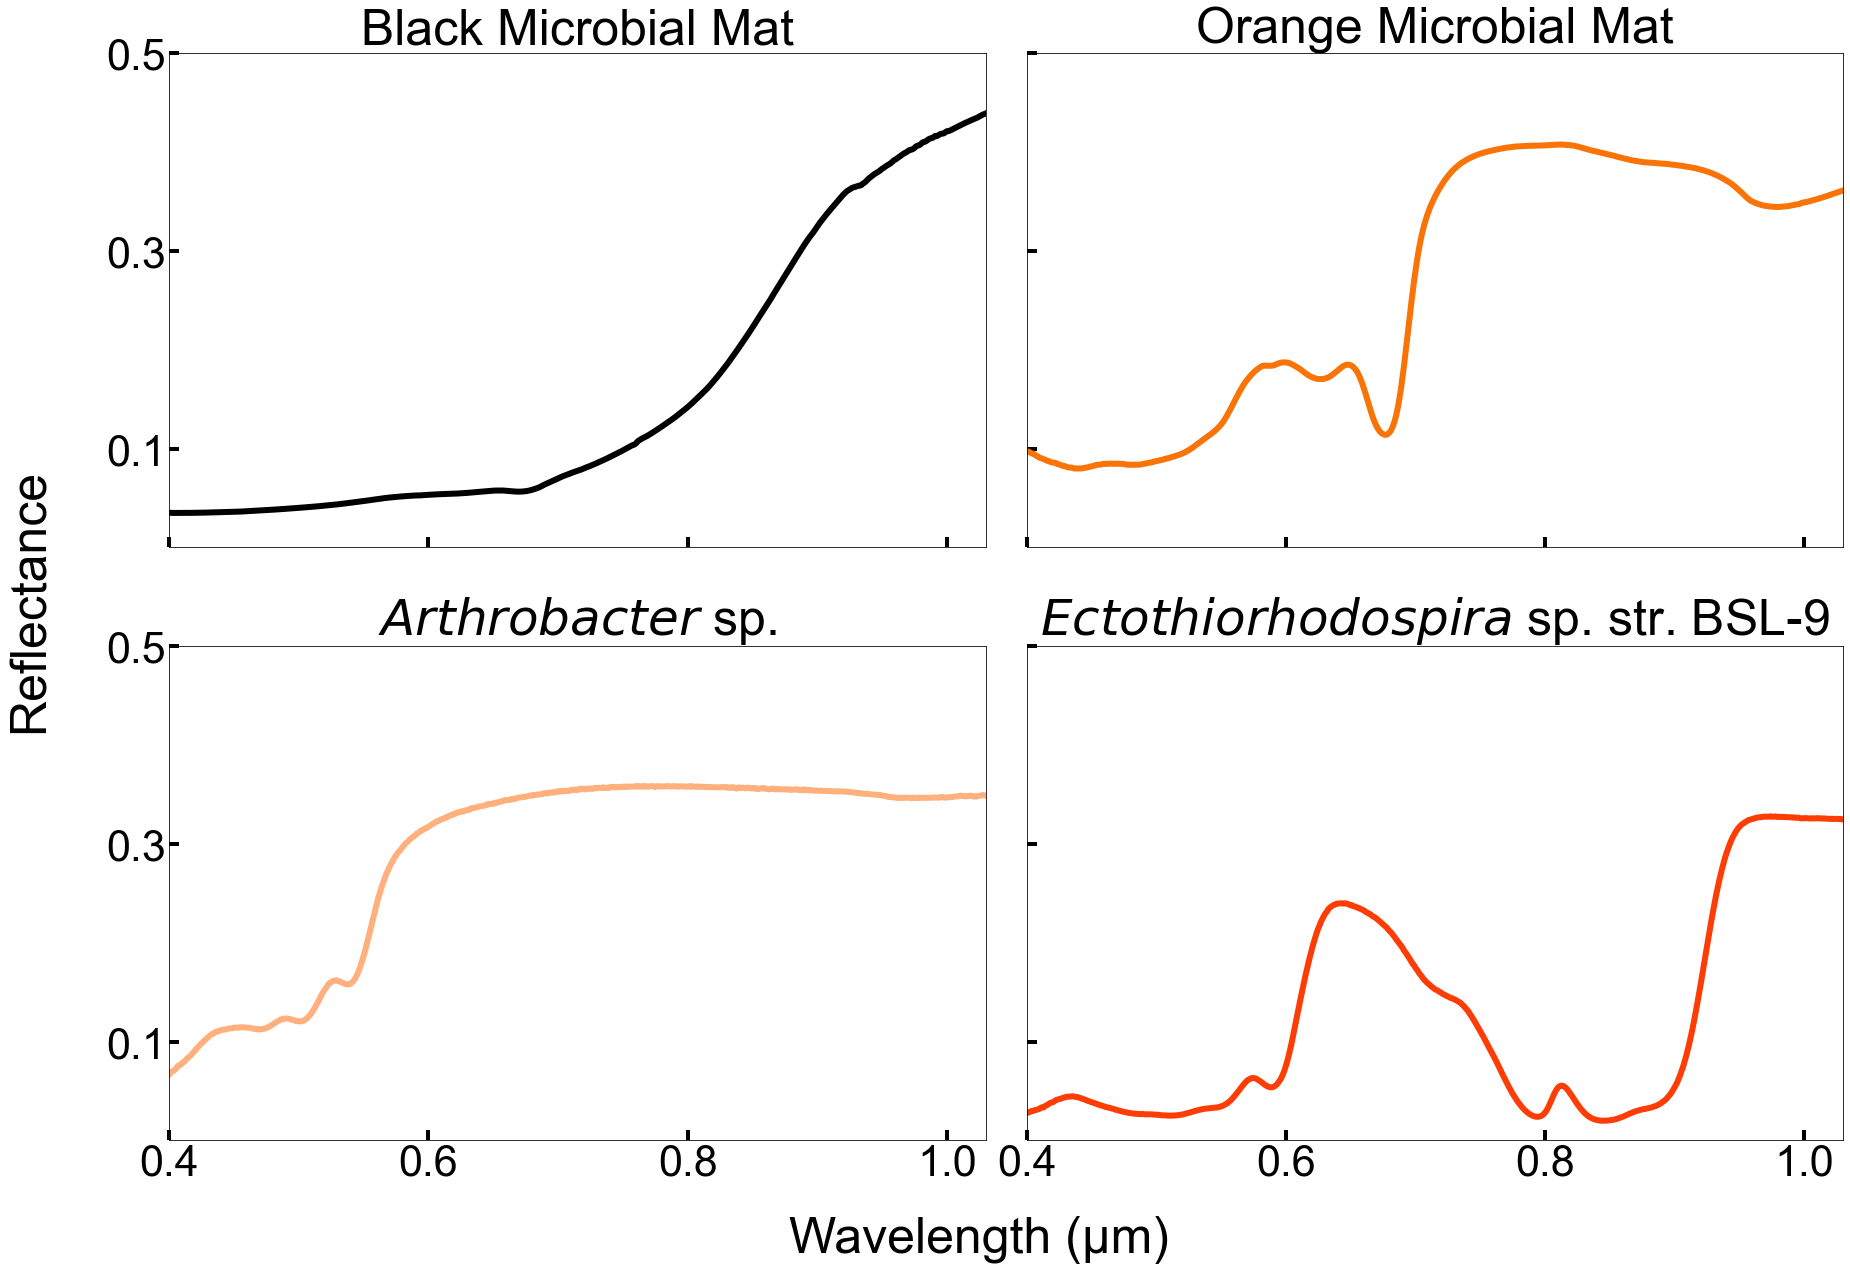

In [13]:
# Biological surface spectra plotted


font = {'fontname':'Arial'}

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30, 20)
fig.set_facecolor('white')
plt.subplots_adjust(hspace=0.2, wspace=0.05)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.04, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)

# Black Microbial Mat
axs[0,0].plot(wavelength, black.columns[1], 'xkcd:black',linewidth=6)
axs[0,0].set_title('Black Microbial Mat', fontsize = 50, **font)
# Axis parameters
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])
axs[0,0].set_xlim(0.4,1.03)
axs[0,0].set_ylim(0,0.5)


# Orange Microbial Mat
axs[0,1].plot(wavelength, orange.columns[1], 'xkcd:orange',linewidth=6)
axs[0,1].set_title('Orange Microbial Mat', fontsize = 50, **font)
# Axis parameters
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])
axs[0,1].set_xlim(0.4,1.03)
axs[0,1].set_ylim(0,0.5)


# Arthrobacter sp.
axs[1,0].plot(wavelength, arthro.columns[1], 'xkcd:peach',linewidth=6)
axs[1,0].set_title('$\it{Arthrobacter}$ sp.', fontsize = 50, **font)
# Axis parameters
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,0].set_xlim(0.4,1.03)
axs[1,0].set_ylim(0,0.5)


# Ectothiorhodospira sp. str. BSL-9
axs[1,1].plot(wavelength, ecto.columns[1], 'xkcd:red orange',linewidth=6)
axs[1,1].set_title('$\it{Ectothiorhodospira}$ sp. str. BSL-9', fontsize = 50, **font)
# Axis parameters
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])
axs[1,1].set_xlim(0.4,1.03)
axs[1,1].set_ylim(0,0.5)



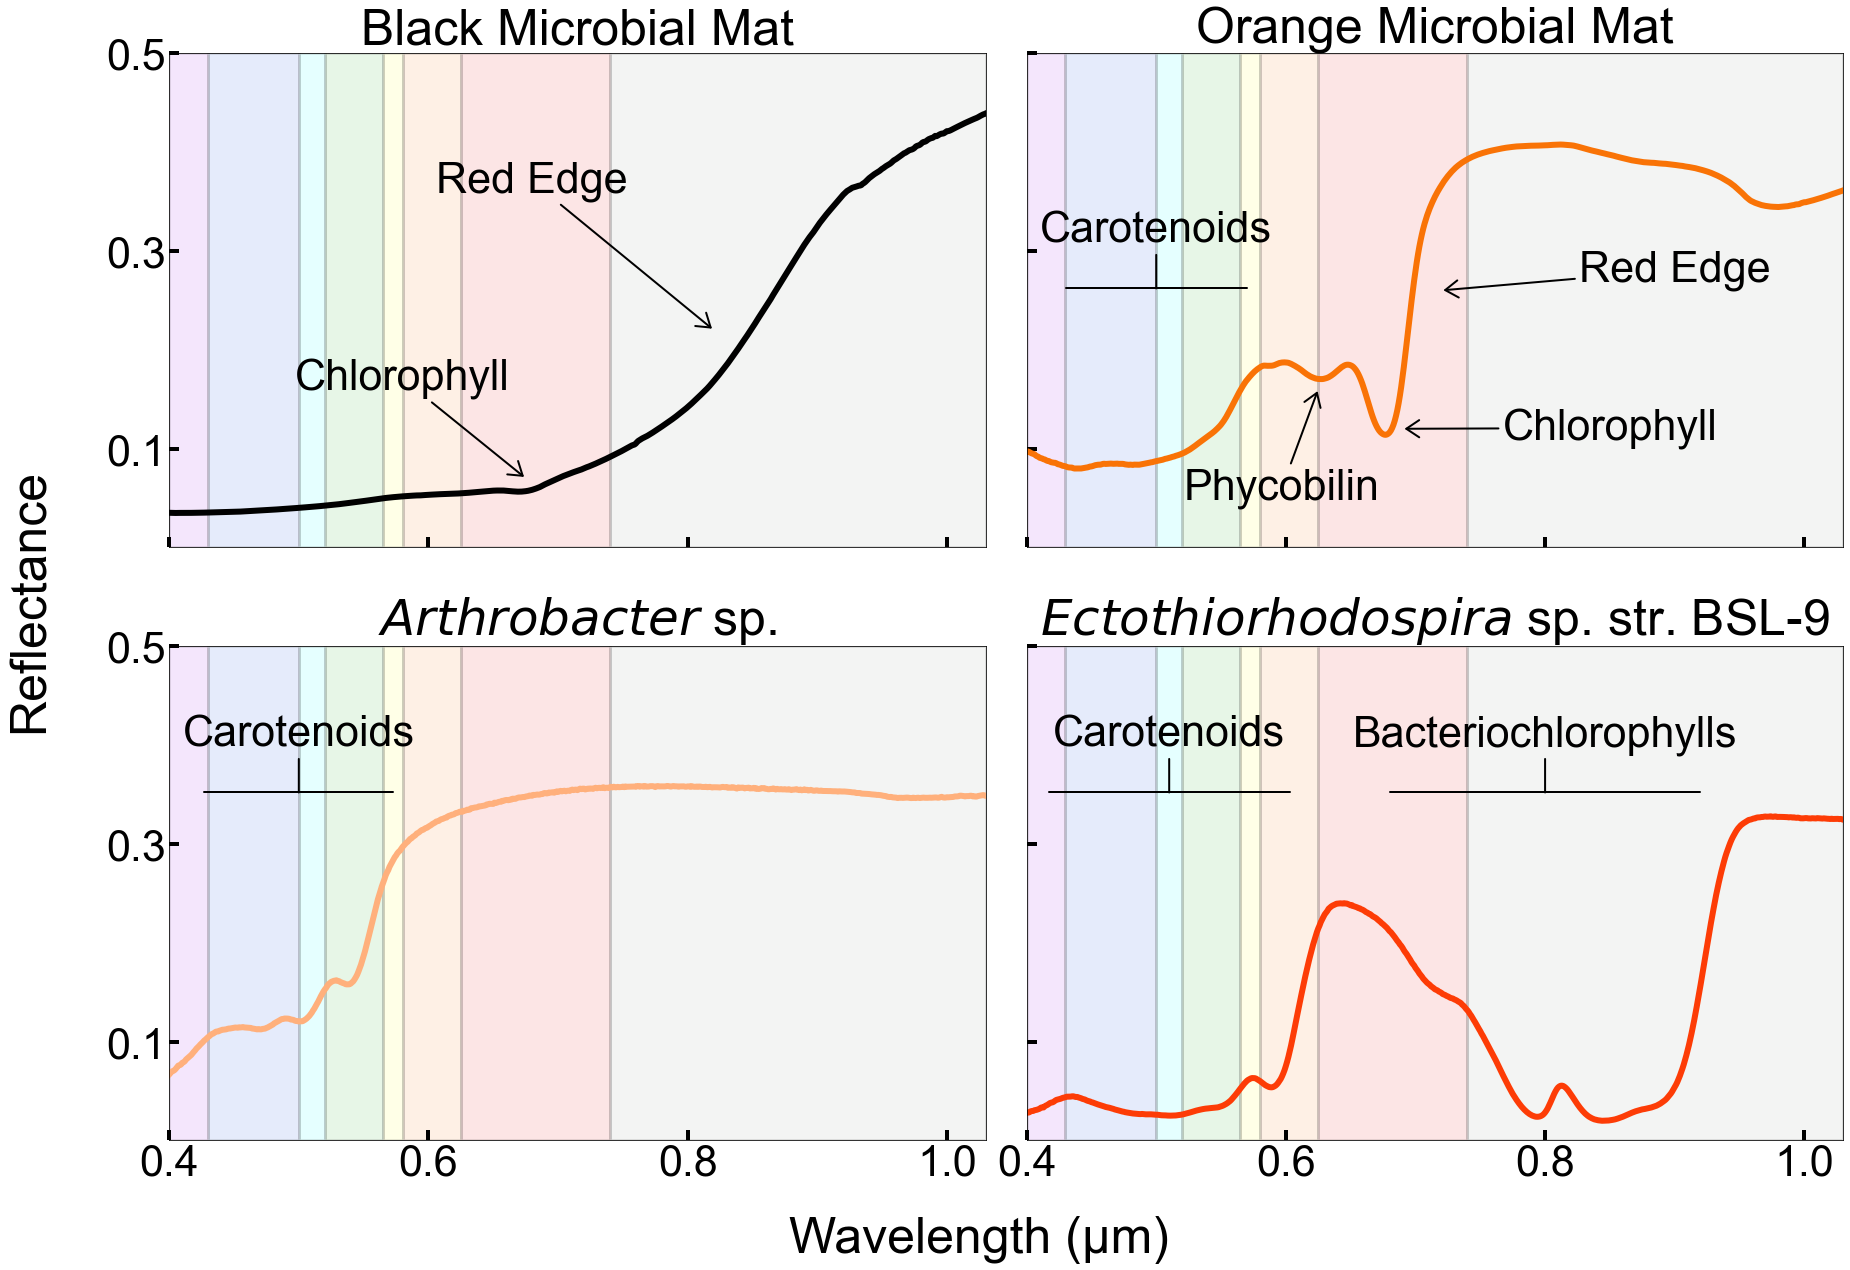

In [7]:
# Annotations of biological surface spectra plotted

font = {'fontname':'Arial'}

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30, 20)
fig.set_facecolor('white')
plt.subplots_adjust(hspace=0.2, wspace=0.05)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.04, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)

# Black Microbial Mat
axs[0,0].plot(wavelength, black.columns[1], 'xkcd:black',linewidth=6)
axs[0,0].set_title('Black Microbial Mat', fontsize = 50, **font)
# Axis parameters
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])
axs[0,0].set_xlim(0.4,1.03)
axs[0,0].set_ylim(0,0.5)
# Annotations
axs[0,0].axvspan(xmin=0.4, xmax=0.43, facecolor='xkcd:violet', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.43, xmax=0.5, facecolor='xkcd:blue', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.5, xmax=0.52, facecolor='xkcd:cyan', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.52, xmax=0.565, facecolor='xkcd:green', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.565, xmax=0.58, facecolor='xkcd:yellow', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.58, xmax=0.625, facecolor='xkcd:orange', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.625, xmax=0.74, facecolor='xkcd:red', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.74, xmax=1.03, facecolor='xkcd:grey', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].annotate('Red Edge', **font, xy=(0.82, 0.22), xytext=(0.68, 0.35),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[0,0].annotate('Chlorophyll', **font, xy=(0.675, 0.07), xytext=(0.58, 0.15),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))

# Orange Microbial Mat
axs[0,1].plot(wavelength, orange.columns[1], 'xkcd:orange',linewidth=6)
axs[0,1].set_title('Orange Microbial Mat', fontsize = 50, **font)
# Axis parameters
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])
axs[0,1].set_xlim(0.4,1.03)
axs[0,1].set_ylim(0,0.5)
# Annotations
axs[0,1].axvspan(xmin=0.4, xmax=0.43, facecolor='xkcd:violet', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.43, xmax=0.5, facecolor='xkcd:blue', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.5, xmax=0.52, facecolor='xkcd:cyan', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.52, xmax=0.565, facecolor='xkcd:green', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.565, xmax=0.58, facecolor='xkcd:yellow', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.58, xmax=0.625, facecolor='xkcd:orange', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.625, xmax=0.74, facecolor='xkcd:red', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.74, xmax=1.03, facecolor='xkcd:grey', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].annotate('Chlorophyll', **font, xy=(0.69, 0.12), xytext=(0.85, 0.1),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[0,1].annotate('Phycobilin', **font, xy=(0.625, 0.16), xytext=(0.597, 0.04),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[0,1].annotate('Carotenoids', **font, xy=(0.5, 0.26), xytext=(0.5, 0.3), 
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='|-|, widthB=2.1, widthA=0', lw=2.0))
axs[0,1].annotate('Red Edge', **font, xy=(0.72, 0.26), xytext=(0.9, 0.26),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))

# Arthrobacter sp.
axs[1,0].plot(wavelength, arthro.columns[1], 'xkcd:peach',linewidth=6)
axs[1,0].set_title('$\it{Arthrobacter}$ sp.', fontsize = 50, **font)
# Axis parameters
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,0].set_xlim(0.4,1.03)
axs[1,0].set_ylim(0,0.5)
# Annotations
axs[1,0].axvspan(xmin=0.4, xmax=0.43, facecolor='xkcd:violet', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.43, xmax=0.5, facecolor='xkcd:blue', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.5, xmax=0.52, facecolor='xkcd:cyan', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.52, xmax=0.565, facecolor='xkcd:green', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.565, xmax=0.58, facecolor='xkcd:yellow', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.58, xmax=0.625, facecolor='xkcd:orange', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.625, xmax=0.74, facecolor='xkcd:red', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.74, xmax=1.03, facecolor='xkcd:grey', alpha=0.1, edgecolor='xkcd:black',linewidth=3)
axs[1,0].annotate('Carotenoids', **font, xy=(0.5, 0.35), xytext=(0.5, 0.39),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='|-|, widthB=2.2, widthA=0', lw=2.0))


# Ectothiorhodospira sp. str. BSL-9
axs[1,1].plot(wavelength, ecto.columns[1], 'xkcd:red orange',linewidth=6)
axs[1,1].set_title('$\it{Ectothiorhodospira}$ sp. str. BSL-9', fontsize = 50, **font)
# Axis parameters
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])
axs[1,1].set_xlim(0.4,1.03)
axs[1,1].set_ylim(0,0.5)
# Annotations
axs[1,1].axvspan(xmin=0.4, xmax=0.43, facecolor='xkcd:violet', alpha=0.10, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.43, xmax=0.5, facecolor='xkcd:blue', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.5, xmax=0.52, facecolor='xkcd:cyan', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.52, xmax=0.565, facecolor='xkcd:green', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.565, xmax=0.58, facecolor='xkcd:yellow', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.58, xmax=0.625, facecolor='xkcd:orange', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.625, xmax=0.74, facecolor='xkcd:red', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.74, xmax=1.03, facecolor='xkcd:grey', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].annotate('Carotenoids', **font, xy=(0.51, 0.35), xytext=(0.51, 0.39), 
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='|-|, widthB=2.8, widthA=0', lw=2.0))
axs[1,1].annotate('Bacteriochlorophylls', **font, xy=(0.8, 0.35), xytext=(0.8, 0.39), 
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='|-|, widthB=3.6, widthA=0', lw=2.0))

plt.savefig('/Users/schuylerraeschroerborges/Downloads/Figure2.tif', format='tif')

Text(0.5, 0.3, 'Carotenoids')

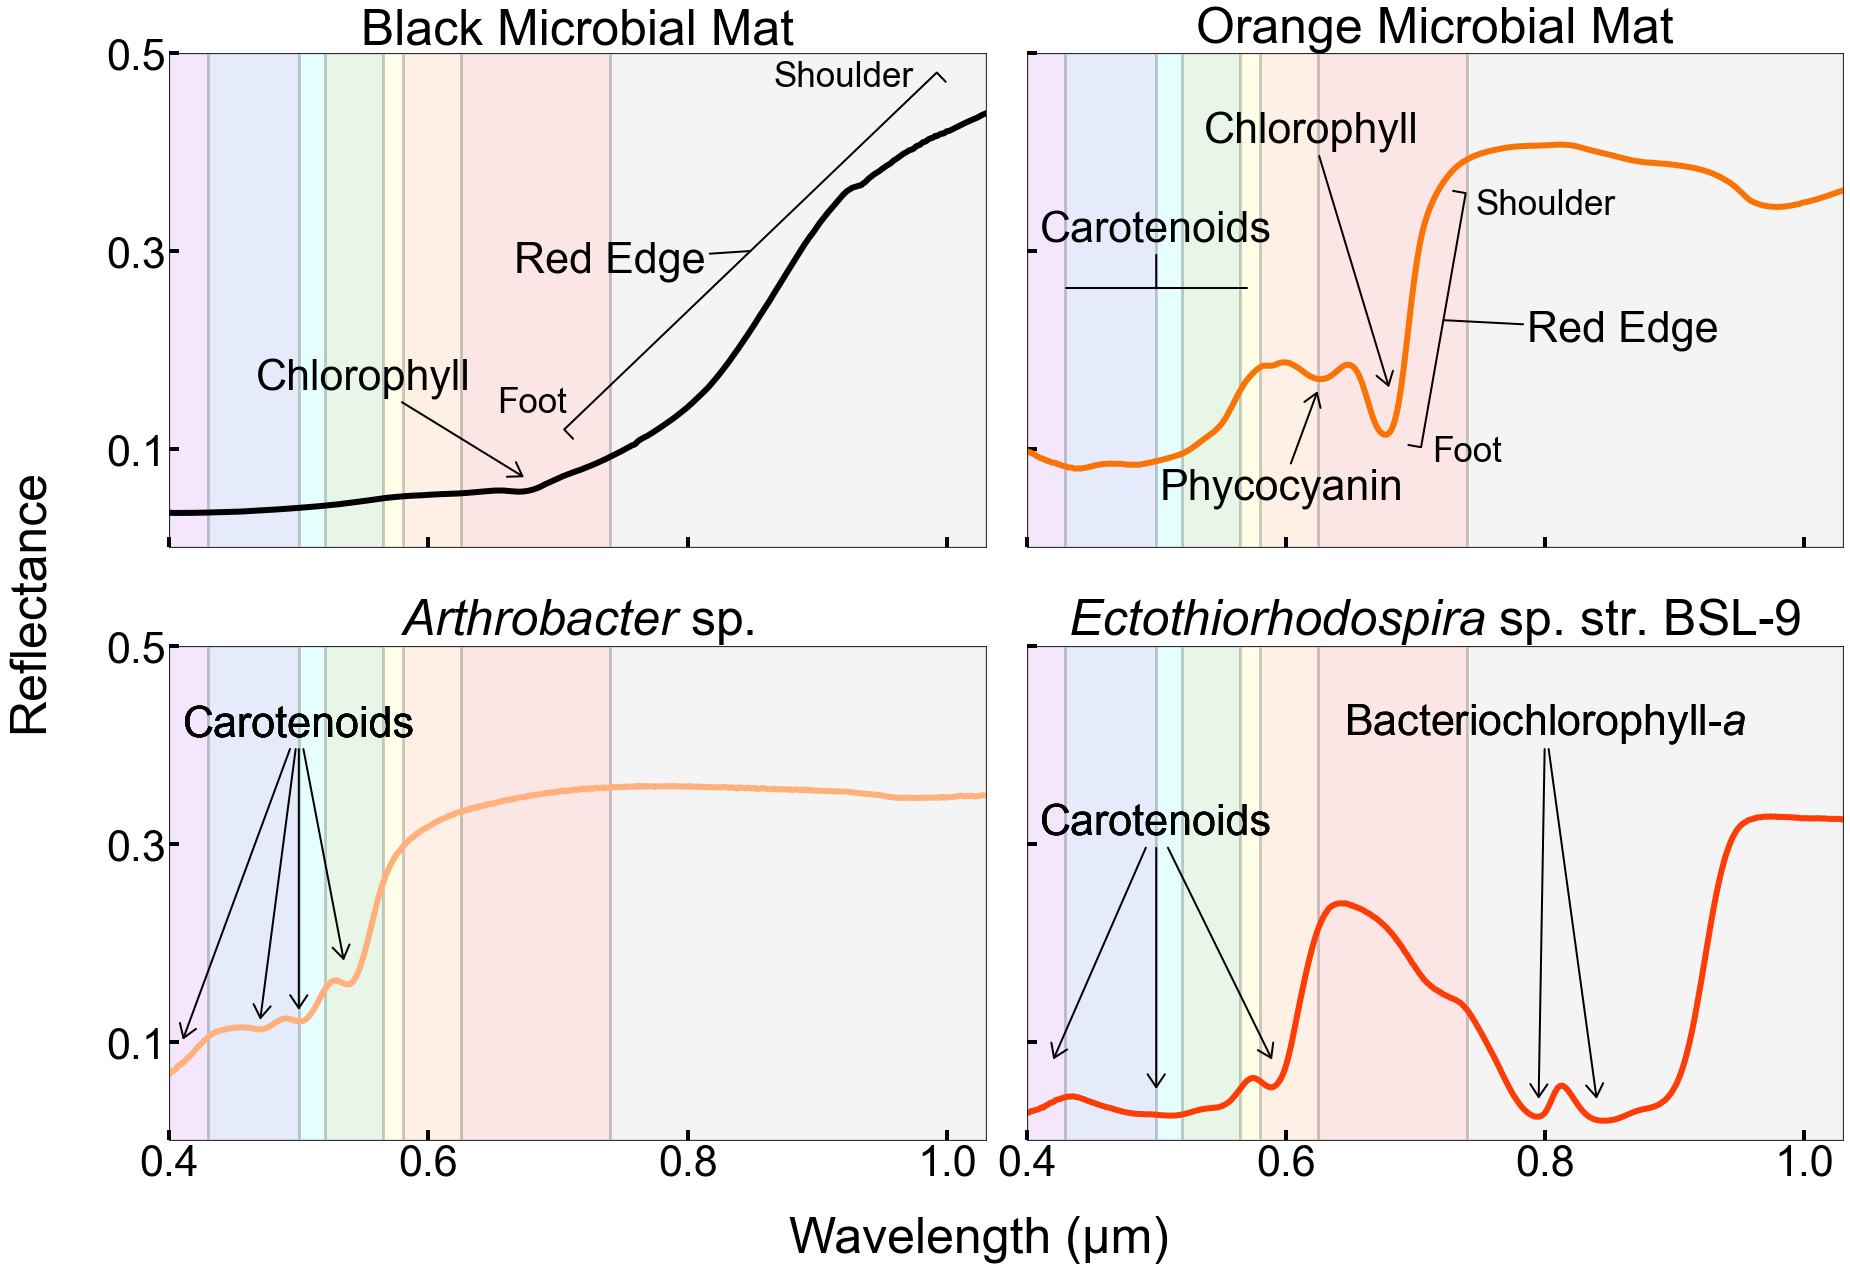

In [163]:
# Annotations of biological surface spectra plotted

font = {'fontname':'Arial'}
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.it']= 'Arial:italic'
plt.rcParams['mathtext.cal']= 'Arial:italic'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams["mathtext.fontset"] = 'custom'

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30, 20)
fig.set_facecolor('white')
plt.subplots_adjust(hspace=0.2, wspace=0.05)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.04, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)


# Black Microbial Mat
axs[0,0].plot(wavelength, black.columns[1], 'xkcd:black',linewidth=6)
axs[0,0].set_title('Black Microbial Mat', fontsize = 50, **font)
# Axis parameters
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])
axs[0,0].set_xlim(0.4,1.03)
axs[0,0].set_ylim(0,0.5)
# Annotations
axs[0,0].axvspan(xmin=0.4, xmax=0.43, facecolor='xkcd:violet', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.43, xmax=0.5, facecolor='xkcd:blue', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.5, xmax=0.52, facecolor='xkcd:cyan', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.52, xmax=0.565, facecolor='xkcd:green', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.565, xmax=0.58, facecolor='xkcd:yellow', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.58, xmax=0.625, facecolor='xkcd:orange', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.625, xmax=0.74, facecolor='xkcd:red', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].axvspan(xmin=0.74, xmax=1.03, facecolor='xkcd:grey', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,0].annotate('Chlorophyll', **font, xy=(0.675, 0.07), xytext=(0.55, 0.15),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[0,0].annotate('Red Edge', **font, xy=(0.85, 0.3), xytext=(0.74, 0.27), 
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=6, lengthB=0.3, angleB=-50', lw=2.0))
axs[0,0].annotate('Foot', **font, xy=(0.68, 0.13),
            fontsize=35, ha='center', va='bottom')
axs[0,0].annotate('Shoulder', **font, xy=(0.92, 0.46),
            fontsize=35, ha='center', va='bottom')
# axs[0,0].annotate('Red Edge', **font, xy=(0.88, 0.21), xytext=(0.95, 0.14), 
#             fontsize=43, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='-[, widthB=4, lengthB=0.3, angleB=-10', lw=2.0))
# axs[0,0].annotate('Foot', **font, xy=(0.84, 0.04),
#             fontsize=35, ha='center', va='bottom')
# axs[0,0].annotate('Shoulder', **font, xy=(0.88, 0.4),
#             fontsize=35, ha='center', va='bottom')

# Orange Microbial Mat
axs[0,1].plot(wavelength, orange.columns[1], 'xkcd:orange',linewidth=6)
axs[0,1].set_title('Orange Microbial Mat', fontsize = 50, **font)
# Axis parameters
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])
axs[0,1].set_xlim(0.4,1.03)
axs[0,1].set_ylim(0,0.5)
# Annotations
axs[0,1].axvspan(xmin=0.4, xmax=0.43, facecolor='xkcd:violet', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.43, xmax=0.5, facecolor='xkcd:blue', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.5, xmax=0.52, facecolor='xkcd:cyan', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.52, xmax=0.565, facecolor='xkcd:green', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.565, xmax=0.58, facecolor='xkcd:yellow', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.58, xmax=0.625, facecolor='xkcd:orange', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.625, xmax=0.74, facecolor='xkcd:red', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].axvspan(xmin=0.74, xmax=1.03, facecolor='xkcd:grey', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[0,1].annotate('Chlorophyll', **font, xy=(0.68, 0.16), xytext=(0.62, 0.4),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[0,1].annotate('Phycocyanin', **font, xy=(0.625, 0.16), xytext=(0.597, 0.04),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[0,1].annotate('Carotenoids', **font, xy=(0.5, 0.26), xytext=(0.5, 0.3), 
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='|-|, widthB=2.1, widthA=0', lw=2.0))
axs[0,1].annotate('Red Edge', **font, xy=(0.72, 0.23), xytext=(0.86, 0.2), 
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=0.3, angleB=-7', lw=2.0))
axs[0,1].annotate('Foot', **font, xy=(0.74, 0.08),
            fontsize=35, ha='center', va='bottom')
axs[0,1].annotate('Shoulder', **font, xy=(0.8, 0.33),
            fontsize=35, ha='center', va='bottom')

# Arthrobacter sp.
axs[1,0].plot(wavelength, arthro.columns[1], 'xkcd:peach',linewidth=6)
axs[1,0].set_title('$\it{Arthrobacter}$ sp.', fontsize = 50, **font)
# Axis parameters
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,0].set_xlim(0.4,1.03)
axs[1,0].set_ylim(0,0.5)
# Annotations
axs[1,0].axvspan(xmin=0.4, xmax=0.43, facecolor='xkcd:violet', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.43, xmax=0.5, facecolor='xkcd:blue', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.5, xmax=0.52, facecolor='xkcd:cyan', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.52, xmax=0.565, facecolor='xkcd:green', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.565, xmax=0.58, facecolor='xkcd:yellow', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.58, xmax=0.625, facecolor='xkcd:orange', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.625, xmax=0.74, facecolor='xkcd:red', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,0].axvspan(xmin=0.74, xmax=1.03, facecolor='xkcd:grey', alpha=0.1, edgecolor='xkcd:black',linewidth=3)
# axs[1,0].annotate('Carotenoids', **font, xy=(0.5, 0.35), xytext=(0.5, 0.39),
#             fontsize=43, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='|-|, widthB=2.2, widthA=0', lw=2.0))
axs[1,0].annotate('Carotenoids', **font, xy=(0.535, 0.18), xytext=(0.5, 0.4),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[1,0].annotate('Carotenoids', **font, xy=(0.5, 0.13), xytext=(0.5, 0.4),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[1,0].annotate('Carotenoids', **font, xy=(0.47, 0.12), xytext=(0.5, 0.4),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[1,0].annotate('Carotenoids', **font, xy=(0.41, 0.1), xytext=(0.5, 0.4),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))


# Ectothiorhodospira sp. str. BSL-9
axs[1,1].plot(wavelength, ecto.columns[1], 'xkcd:red orange',linewidth=6)
axs[1,1].set_title('$\it{Ectothiorhodospira}$ sp. str. BSL-9', fontsize = 50, **font)
# Axis parameters
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])
axs[1,1].set_xlim(0.4,1.03)
axs[1,1].set_ylim(0,0.5)
# Annotations
axs[1,1].axvspan(xmin=0.4, xmax=0.43, facecolor='xkcd:violet', alpha=0.10, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.43, xmax=0.5, facecolor='xkcd:blue', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.5, xmax=0.52, facecolor='xkcd:cyan', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.52, xmax=0.565, facecolor='xkcd:green', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.565, xmax=0.58, facecolor='xkcd:yellow', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.58, xmax=0.625, facecolor='xkcd:orange', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.625, xmax=0.74, facecolor='xkcd:red', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
axs[1,1].axvspan(xmin=0.74, xmax=1.03, facecolor='xkcd:grey', alpha=0.1, edgecolor='xkcd:black', linewidth=3)
# axs[1,1].annotate('Carotenoids', **font, xy=(0.51, 0.35), xytext=(0.51, 0.39), 
#             fontsize=43, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='|-|, widthB=2.8, widthA=0', lw=2.0))
# axs[1,1].annotate('Bacteriochlorophylls', **font, xy=(0.8, 0.35), xytext=(0.8, 0.39), 
#             fontsize=43, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='|-|, widthB=3.6, widthA=0', lw=2.0))
axs[1,1].annotate('Bacteriochlorophyll-$\it{a}$', **font, xy=(0.795, 0.04), xytext=(0.8, 0.4),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[1,1].annotate('Bacteriochlorophyll-$\it{a}$', **font, xy=(0.84, 0.04), xytext=(0.8, 0.4),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
# axs[1,1].annotate('Bacteriochlorophyll-a', **font, xy=(0.88, 0.05), xytext=(0.8, 0.4),
#             fontsize=43, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
# axs[1,1].annotate('Carotenoid', **font, xy=(0.72, 0.17), xytext=(0.7, 0.3),
#             fontsize=43, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[1,1].annotate('Carotenoids', **font, xy=(0.59, 0.08), xytext=(0.5, 0.3),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[1,1].annotate('Carotenoids', **font, xy=(0.5, 0.05), xytext=(0.5, 0.3),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))
axs[1,1].annotate('Carotenoids', **font, xy=(0.42, 0.08), xytext=(0.5, 0.3),
            fontsize=43, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_width=0.2, head_length=0.3', lw=2.0))

#plt.savefig('/Users/schuylerraeschroerborges/Downloads/Figure2.tif', format='tif')

[]

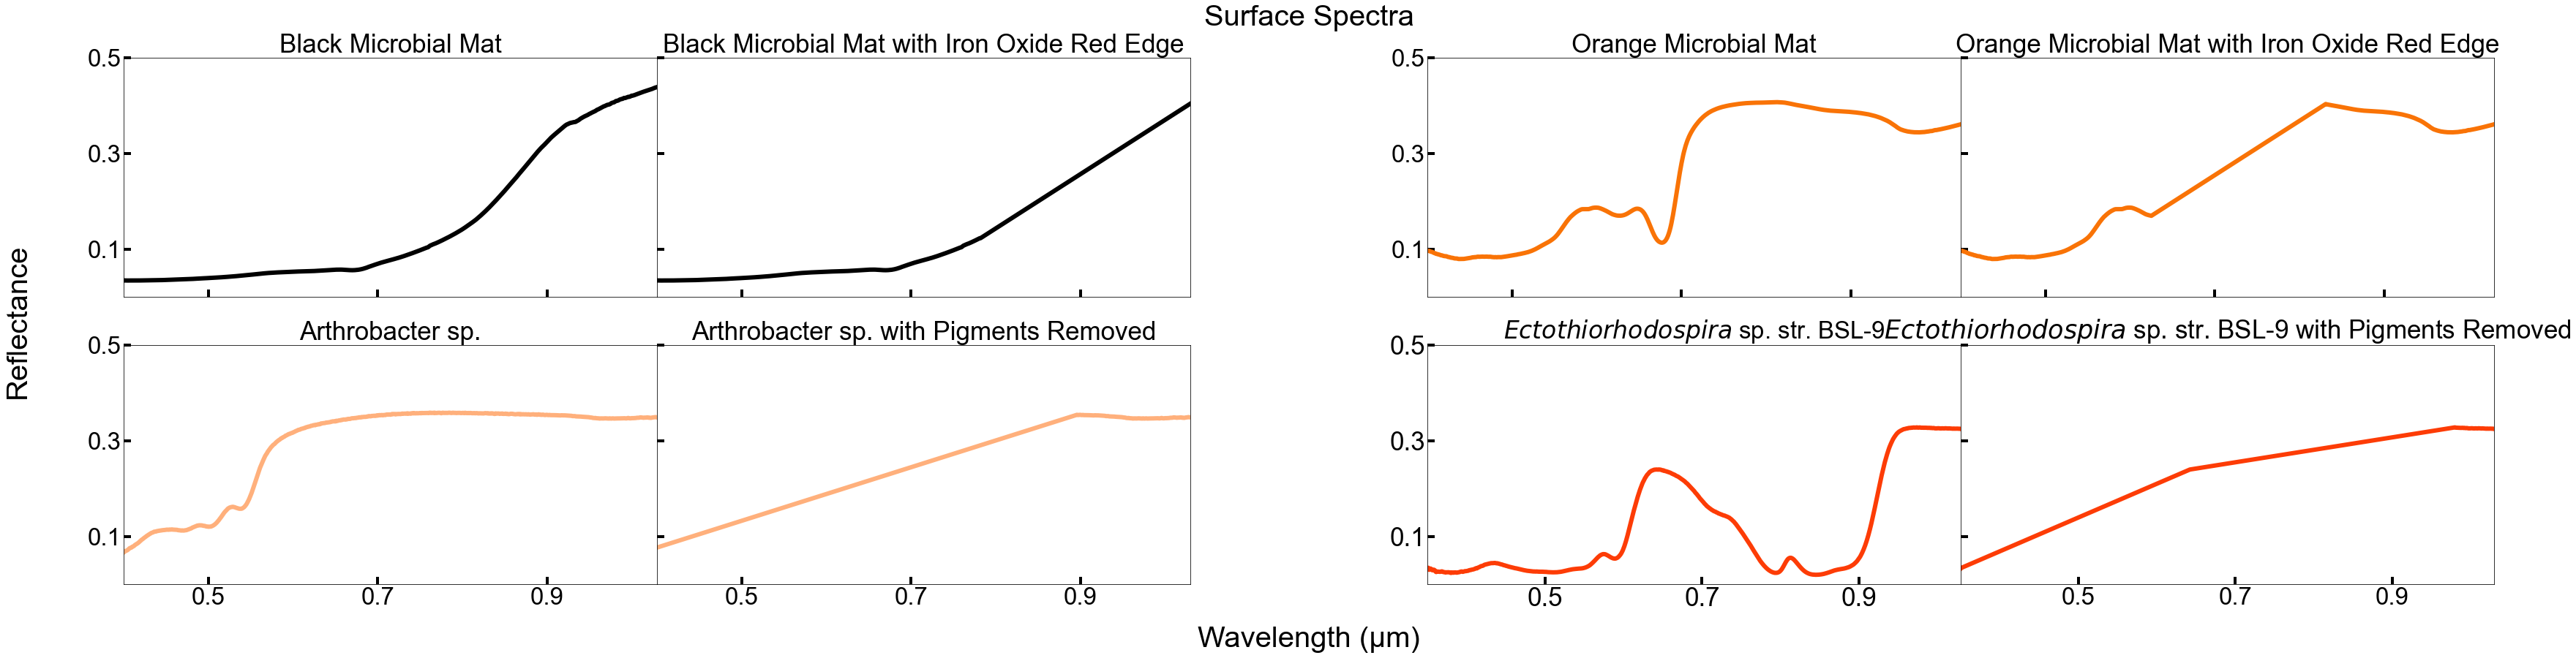

In [32]:
#All surface spectra

font = {'fontname':'Arial'}

fig = plt.figure(facecolor='white', figsize=(45,10))
fig.suptitle('Surface Spectra', fontsize=40, y=1.1, **font)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 40, x=0.5, y=-0.13, **font)
fig.supylabel('Reflectance', fontsize = 40, x=-0.05, y=0.5, **font)

gs1 = gridspec.GridSpec(2, 2)
gs1.update(left=0.0, right=0.45, bottom=0.0 , top=1., wspace=0, hspace=0.2)

ax0 = fig.add_subplot(gs1[0, 0])
ax0.plot(wavelength, black.columns[1],'xkcd:black', linewidth=6)
ax0.set_title('Black Microbial Mat', fontsize = 35, **font)
ax0.tick_params(axis='both', direction='in', length=10, width=4, labelsize=33)
ax0.set_yticks(np.arange(0.1, 0.6, step=0.2))
ax0.set_xticks(np.arange(0.5, 1.03, step=0.2))
for tick in ax0.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax0.get_yticklabels():
    tick.set_fontname("Arial")
ax0.xaxis.set_ticklabels([])
ax0.set_xlim(0.4,1.03)
ax0.set_ylim(0,0.5)
ax0.plot()

ax1 = fig.add_subplot(gs1[0,1])
ax1.plot(wavelength, bscrub.columns[1], 'xkcd:black', linewidth=6)
ax1.set_title('Black Microbial Mat with Iron Oxide Red Edge', fontsize = 35, **font)
ax1.tick_params(axis='both', direction='in', length=10, width=4, labelsize=33)
ax1.set_yticks(np.arange(0.1, 0.6, step=0.2))
ax1.set_xticks(np.arange(0.5, 1.03, step=0.2))
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_xlim(0.4,1.03)
ax1.set_ylim(0,0.5)
ax1.yaxis.set_ticklabels([])
ax1.xaxis.set_ticklabels([])
ax1.plot()

ax2 = fig.add_subplot(gs1[1, 0])
ax2.plot(wavelength, arthro.columns[1], 'xkcd:peach', linewidth=6)
ax2.set_title('Arthrobacter sp.', fontsize = 35, **font)
ax2.tick_params(axis='both', direction='in', length=10, width=4, labelsize=33)
ax2.set_yticks(np.arange(0.1, 0.6, step=0.2))
ax2.set_xticks(np.arange(0.5, 1.03, step=0.2))
for tick in ax2.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Arial")
ax2.set_xlim(0.4,1.03)
ax2.set_ylim(0,0.5)
ax2.plot()

ax3 = fig.add_subplot(gs1[1,1])
ax3.plot(wavelength, ascrub.columns[1], 'xkcd:peach', linewidth=6)
ax3.set_title('Arthrobacter sp. with Pigments Removed', fontsize = 35, **font)
ax3.tick_params(axis='both', direction='in', length=10, width=4,labelsize=33)
ax3.set_yticks(np.arange(0.1, 0.6, step=0.2))
ax3.set_xticks(np.arange(0.5, 1.03, step=0.2))
for tick in ax3.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax3.get_yticklabels():
    tick.set_fontname("Arial")
ax3.yaxis.set_ticklabels([])
ax3.set_xlim(0.4,1.03)
ax3.set_ylim(0,0.5)
ax3.plot()




gs2 = gridspec.GridSpec(2, 2)
gs2.update(left=0.55, right=1.0, bottom=0.0 , top=1., wspace=0, hspace=0.2)

ax6 = fig.add_subplot(gs2[0,0])
ax6.plot(wavelength, orange.columns[1], 'xkcd:orange', linewidth=6)
ax6.set_title('Orange Microbial Mat', fontsize = 35, **font)
ax6.tick_params(axis='both', direction='in', length=10, width=4, labelsize=33)
ax6.set_yticks(np.arange(0.1, 0.6, step=0.2))
ax6.set_xticks(np.arange(0.5, 1.03, step=0.2))
for tick in ax6.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax6.get_yticklabels():
    tick.set_fontname("Arial")
ax6.xaxis.set_ticklabels([])
ax6.set_xlim(0.4,1.03)
ax6.set_ylim(0,0.5)
ax6.plot()

ax7 = fig.add_subplot(gs2[0,1])
ax7.plot(wavelength, oscrub.columns[1], 'xkcd:orange', linewidth=6)
ax7.set_title('Orange Microbial Mat with Iron Oxide Red Edge', fontsize = 35, **font)
ax7.tick_params(axis='both', direction='in', length=10, width=4, labelsize=33)
ax7.set_yticks(np.arange(0.1, 0.6, step=0.2))
ax7.set_xticks(np.arange(0.5, 1.03, step=0.2))
for tick in ax3.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax3.get_yticklabels():
    tick.set_fontname("Arial")
ax7.yaxis.set_ticklabels([])
ax7.xaxis.set_ticklabels([])
ax7.set_xlim(0.4,1.03)
ax7.set_ylim(0,0.5)
ax7.plot()


ax8 = fig.add_subplot(gs2[1,0])
ax8.plot(wavelength, ecto.columns[1], 'xkcd:red orange', linewidth=6)
ax8.set_title('$\it{Ectothiorhodospira}$ sp. str. BSL-9', fontsize = 33, **font)
ax8.tick_params(axis='both', direction='in', length=10, width=4,labelsize=35)
ax8.set_yticks(np.arange(0.1, 0.6, step=0.2))
ax8.set_xticks(np.arange(0.5, 1.03, step=0.2))
for tick in ax8.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax8.get_yticklabels():
    tick.set_fontname("Arial")
ax8.set_xlim(0.4,1.03)
ax8.set_ylim(0,0.5)
ax8.plot()

ax9 = fig.add_subplot(gs2[1,1])
ax9.plot(wavelength, escrub.columns[1],'xkcd:red orange', linewidth=6)
ax9.set_title('$\it{Ectothiorhodospira}$ sp. str. BSL-9 with Pigments Removed', fontsize = 35, **font)
ax9.tick_params(axis='both', direction='in', length=10, width=4,labelsize=33)
ax9.set_yticks(np.arange(0.1, 0.6, step=0.2))
ax9.set_xticks(np.arange(0.5, 1.03, step=0.2))
for tick in ax9.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax9.get_yticklabels():
    tick.set_fontname("Arial")
ax9.yaxis.set_ticklabels([])
ax9.set_xlim(0.4,1.03)
ax9.set_ylim(0,0.5)
ax9.plot()


#plt.savefig('All_Surface_spectra_20220413.png')

[Text(0, 0.1, ''),
 Text(0, 0.30000000000000004, ''),
 Text(0, 0.5000000000000001, '')]

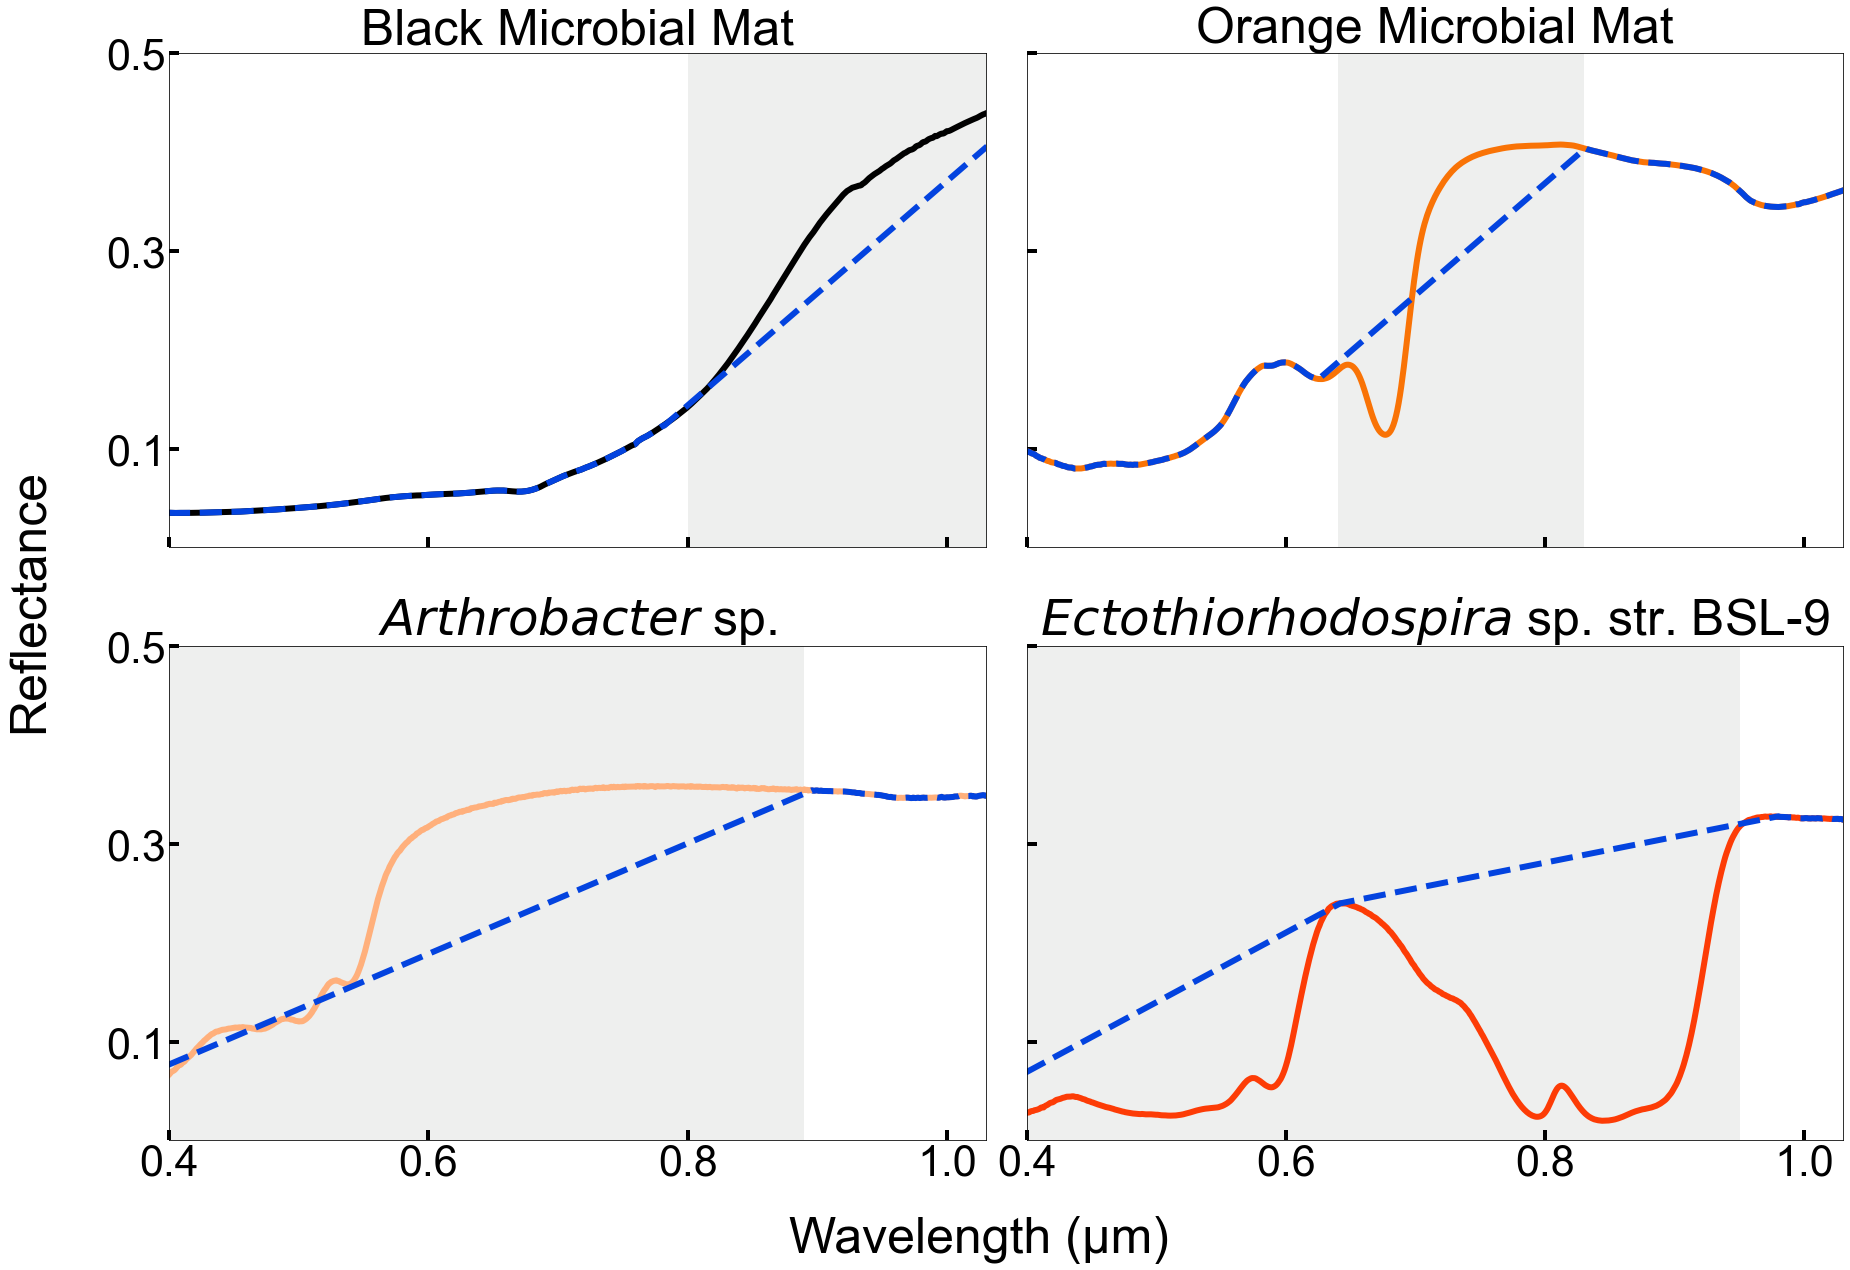

In [6]:
#Biological and abiologic surface spectra

font = {'fontname':'Arial'}

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30, 20)
fig.set_facecolor('white')
plt.subplots_adjust(hspace=0.2, wspace=0.05)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.04, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)
xlim=(0.4,1.030)
ylim=(0,0.5)
plt.setp(axs, xlim=xlim, ylim=ylim)
legparams = font_manager.FontProperties(family = 'Arial', size = 40)


# Black mat
axs[0,0].plot(wavelength, black.columns[1], 'xkcd:black',linewidth=6, label = 'Biotic')
axs[0,0].plot(wavelength, bscrub.columns[1], 'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
#axs[0,0].set_title('a.', fontsize = 50, **font, x = 0.08, y = 1.03)
axs[0,0].set_title('Black Microbial Mat', fontsize = 50, **font)
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].axvspan(xmin=0.8, xmax=1.03, facecolor='xkcd:grey', alpha=0.15)
axs[0,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[0,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])

# Orange mat
axs[0,1].plot(wavelength, orange.columns[1], 'xkcd:orange',linewidth=6, label = 'Biotic')
axs[0,1].plot(wavelength, oscrub.columns[1], 'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
#axs[0,1].set_title('b.', fontsize = 50, **font, x = 0.1, y = 1.03)
axs[0,1].set_title('Orange Microbial Mat', fontsize = 50, **font)
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].axvspan(xmin=0.64, xmax=0.83, facecolor='xkcd:grey', alpha=0.15)
axs[0,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[0,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])

# Arthrobacter
axs[1,0].plot(wavelength, arthro.columns[1], 'xkcd:peach',linewidth=6, label = 'Biotic')
axs[1,0].plot(wavelength, ascrub.columns[1], 'xkcd:blue',linewidth=6, ls= 'dashed', label = 'Abiotic')
#axs[1,0].set_title('c.', fontsize = 50, **font, x = 0.08, y = 1.03)
axs[1,0].set_title('$\it{Arthrobacter}$ sp.', fontsize = 50, **font)
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].axvspan(xmin=0.35, xmax=0.89, facecolor='xkcd:grey', alpha=0.15)
axs[1,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[1,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")

# Ectothiorhodospira
axs[1,1].plot(wavelength, ecto.columns[1], 'xkcd:red orange',linewidth=6, label = 'Biotic')
axs[1,1].plot(wavelength, escrub.columns[1], 'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
#axs[1,1].set_title('d.', fontsize = 50, **font, x = 0.1, y = 1.03)
axs[1,1].set_title('$\it{Ectothiorhodospira}$ sp. str. BSL-9', fontsize = 50, **font)
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].axvspan(xmin=0.4, xmax=0.95, facecolor='xkcd:grey', alpha=0.15)
axs[1,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[1,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])
    
#plt.savefig('/Users/schuylerraeschroerborges/Downloads/Surface_biosignature_fig4_no_legends.eps', format='eps')
    

[]

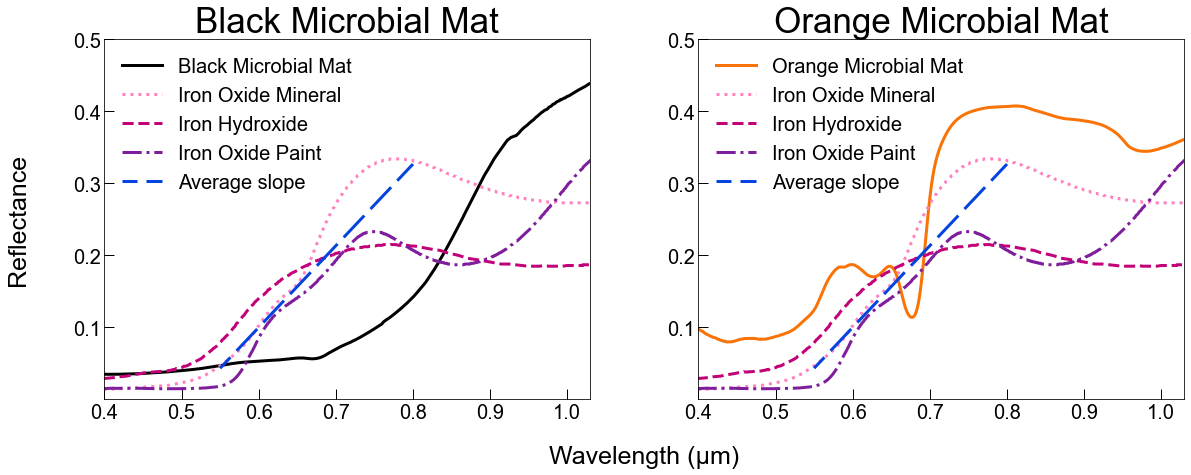

In [52]:
font = {'fontname':'Arial'}

legparams = font_manager.FontProperties(family = 'Arial', size = 20)

fig = plt.figure(facecolor='white', figsize=(15,5))
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 25, **font, x=0.5, y=-0.19)
fig.supylabel('Reflectance', fontsize = 25, **font,  x=-0.09, y=0.5)
xlim=(0.4,1.030)
ylim=(0,0.5)


# Average slope
x = np.linspace(0.55, 0.8, 100)
y = (1.1343*x) - 0.58058

gs1 = gridspec.GridSpec(1, 1)
gs1.update(left=0.0, right=0.45, bottom=0.0 , top=1., wspace=0, hspace=0.2)

ax0 = fig.add_subplot(gs1[0, 0])
ax0.plot(wavelength, black.columns[1], c = 'xkcd:black', lw = 3.0, ls = 'solid', label='Black Microbial Mat')
ax0.plot(wavelength, iron_SA.columns[1], c = 'xkcd:pink', lw = 3.0, ls = 'dotted', label='Iron Oxide Mineral')
#ax0.plot(wavelength, iron_GA.columns[1], c = 'xkcd:red orange', lw = 3.0, ls = 'solid', label = 'Iron Oxide GA')
ax0.plot(wavelength2, iron_hydroxide.columns[1], c = 'xkcd:magenta', lw = 3.0, ls = 'dashed', label='Iron Hydroxide')
ax0.plot(wavelength, iron_oxide.columns[1], c = 'xkcd:purple', lw = 3.0, ls = 'dashdot', label='Iron Oxide Paint')
ax0.plot(x,y, c='xkcd:blue',lw = 3.0, ls = (5,(10,3)), label='Average slope')
ax0.plot()
ax0.set_title('Black Microbial Mat', fontsize = 35, **font)
ax0.tick_params(axis='both', direction='in', length=10, width=1, labelsize=20)
for tick in ax0.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax0.get_yticklabels():
    tick.set_fontname("Arial")
ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
ax0.set_xticks(np.arange(0.4, 1.03, step=0.1))
ax0.set_yticks(np.arange(0.1, 0.6, step=0.1))
ax0.legend(loc='upper left', prop = legparams, frameon=False)
ax0.plot()




gs2 = gridspec.GridSpec(1, 1)
gs2.update(left=0.55, right=1.0, bottom=0.0 , top=1., wspace=0, hspace=0.2)

ax1 = fig.add_subplot(gs2[0,0])
ax1.plot(wavelength, orange.columns[1], c = 'xkcd:orange', lw = 3.0, ls = 'solid', label='Orange Microbial Mat')
ax1.plot(wavelength, iron_SA.columns[1], c = 'xkcd:pink', lw = 3.0, ls = 'dotted', label='Iron Oxide Mineral')
#ax1.plot(wavelength, iron_GA.columns[1], c = 'xkcd:red orange', lw = 3.0, ls = 'solid', label='Iron Oxide GA')
ax1.plot(wavelength2, iron_hydroxide.columns[1], c = 'xkcd:magenta', lw = 3.0, ls = 'dashed', label='Iron Hydroxide')
ax1.plot(wavelength, iron_oxide.columns[1], c = 'xkcd:purple', lw = 3.0, ls = 'dashdot', label='Iron Oxide Paint')
ax1.plot(x,y, c='xkcd:blue',lw = 3.0, ls = (5,(10,3)), label='Average slope')
ax1.set_title('Orange Microbial Mat', fontsize = 35, **font)
ax1.tick_params(axis='both', direction='in', length=10, width=1, labelsize=20)
#ax1.set_yticks(np.arange(100, 10e4, step=10))
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_xticks(np.arange(0.4, 1.03, step=0.1))
ax1.set_yticks(np.arange(0.1, 0.6, step=0.1))
ax1.legend(loc = 'upper left', prop = legparams, frameon=False)
ax1.plot()

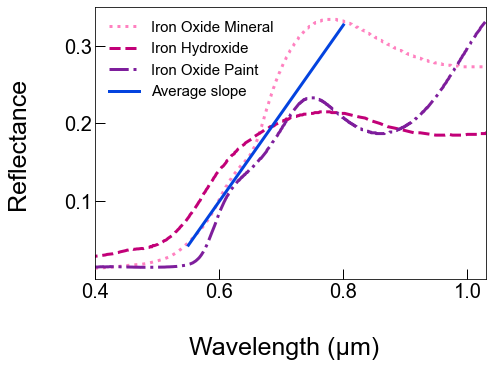

In [10]:
font = {'fontname':'Arial'}

legparams = font_manager.FontProperties(family = 'Arial', size = 15)

fig = plt.figure(facecolor='white', figsize=(7,5))
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 25, **font, x=0.5, y=-0.1)
fig.supylabel('Reflectance', fontsize = 25, **font,  x=-0.05, y=0.5)
xlim=(0.4,1.030)
ylim=(0,0.35)


# Average slope
x = np.linspace(0.55, 0.8, 100)
y = (1.1343*x) - 0.58058

ax0 = fig.add_subplot()
#ax0.plot(wavelength, black.columns[1], c = 'xkcd:black', lw = 3.0, ls = 'solid', label='Black Microbial Mat')
ax0.plot(wavelength, iron_SA.columns[1], c = 'xkcd:pink', lw = 3.0, ls = 'dotted', label='Iron Oxide Mineral')
#ax0.plot(wavelength, iron_GA.columns[1], c = 'xkcd:red orange', lw = 3.0, ls = 'solid', label = 'Iron Oxide GA')
ax0.plot(wavelength2, iron_hydroxide.columns[1], c = 'xkcd:magenta', lw = 3.0, ls = 'dashed', label='Iron Hydroxide')
ax0.plot(wavelength, iron_oxide.columns[1], c = 'xkcd:purple', lw = 3.0, ls = 'dashdot', label='Iron Oxide Paint')
ax0.plot(x,y, c='xkcd:blue',lw = 3.0, ls = "solid", label='Average slope')
ax0.plot()
#ax0.set_title('Black Microbial Mat', fontsize = 35, **font)
ax0.tick_params(axis='both', direction='in', length=10, width=1, labelsize=20)
for tick in ax0.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax0.get_yticklabels():
    tick.set_fontname("Arial")
ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
ax0.set_xticks(np.arange(0.4, 1.03, step=0.2))
ax0.set_yticks(np.arange(0.1, 0.35, step=0.1))
ax0.legend(loc='upper left', prop = legparams, frameon=False)
ax0.plot()

plt.savefig('/Users/schuylerraeschroerborges/Downloads/Figure3.tif', format='tif', bbox_inches="tight")

In [163]:
#Redoing abiotic spectrum for Arthrobacter sp.

#continuum (slope taken between 0.35 and 0.6 um and b calculated from those points)
x = np.round(np.arange(0.350, 0.601, 0.001),3)
y = (1.0741584*x) - 0.32704904
#y = float('%.6g' % ((1.0741584*x) - 0.32704904))


def signif(x, p):
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

y_sig_figs = signif(y, 6)

two_rows = np.array([x,y_sig_figs])

#arthro
biotic_wave = np.array(arthro.columns[0][251:]*10**(-3))
biotic_ref = np.array(arthro.columns[1][251:])

#pandas
list_of_values = {'wavelength': two_rows[0], 'reflectance': two_rows[1]}
abiotic_df = pd.DataFrame(data=list_of_values)

arthro_df = np.array([biotic_wave, biotic_ref])
biotic_df = pd.DataFrame({'wavelength': arthro_df[0], 'reflectance': arthro_df[1]})

arthro_scrub_df = pd.concat([abiotic_df,biotic_df])

#write to text file
#one space between values
#arthro_scrub_df.to_csv(data_folder/'arthro_scrub2_test5.txt', sep=' ', encoding='utf-8', index=False, header=False)
#six spaces between values
myCsv = arthro_scrub_df.astype(str).apply(lambda x: '      '.join(x), axis=1)
myCsv.rename('   '.join(arthro_scrub_df.columns)).to_csv(data_folder/'arthro_scrub2.txt', header=False, index=False)

#astropy Table
table = Table([np.round(x,3),y_sig_figs])
table2 = Table([biotic_wave, biotic_ref])
table3 = vstack([table, table2])

#ascii.write(table3, data_folder/'arthro_scrub2_ascii.txt', data_start=1, delimiter=' ')



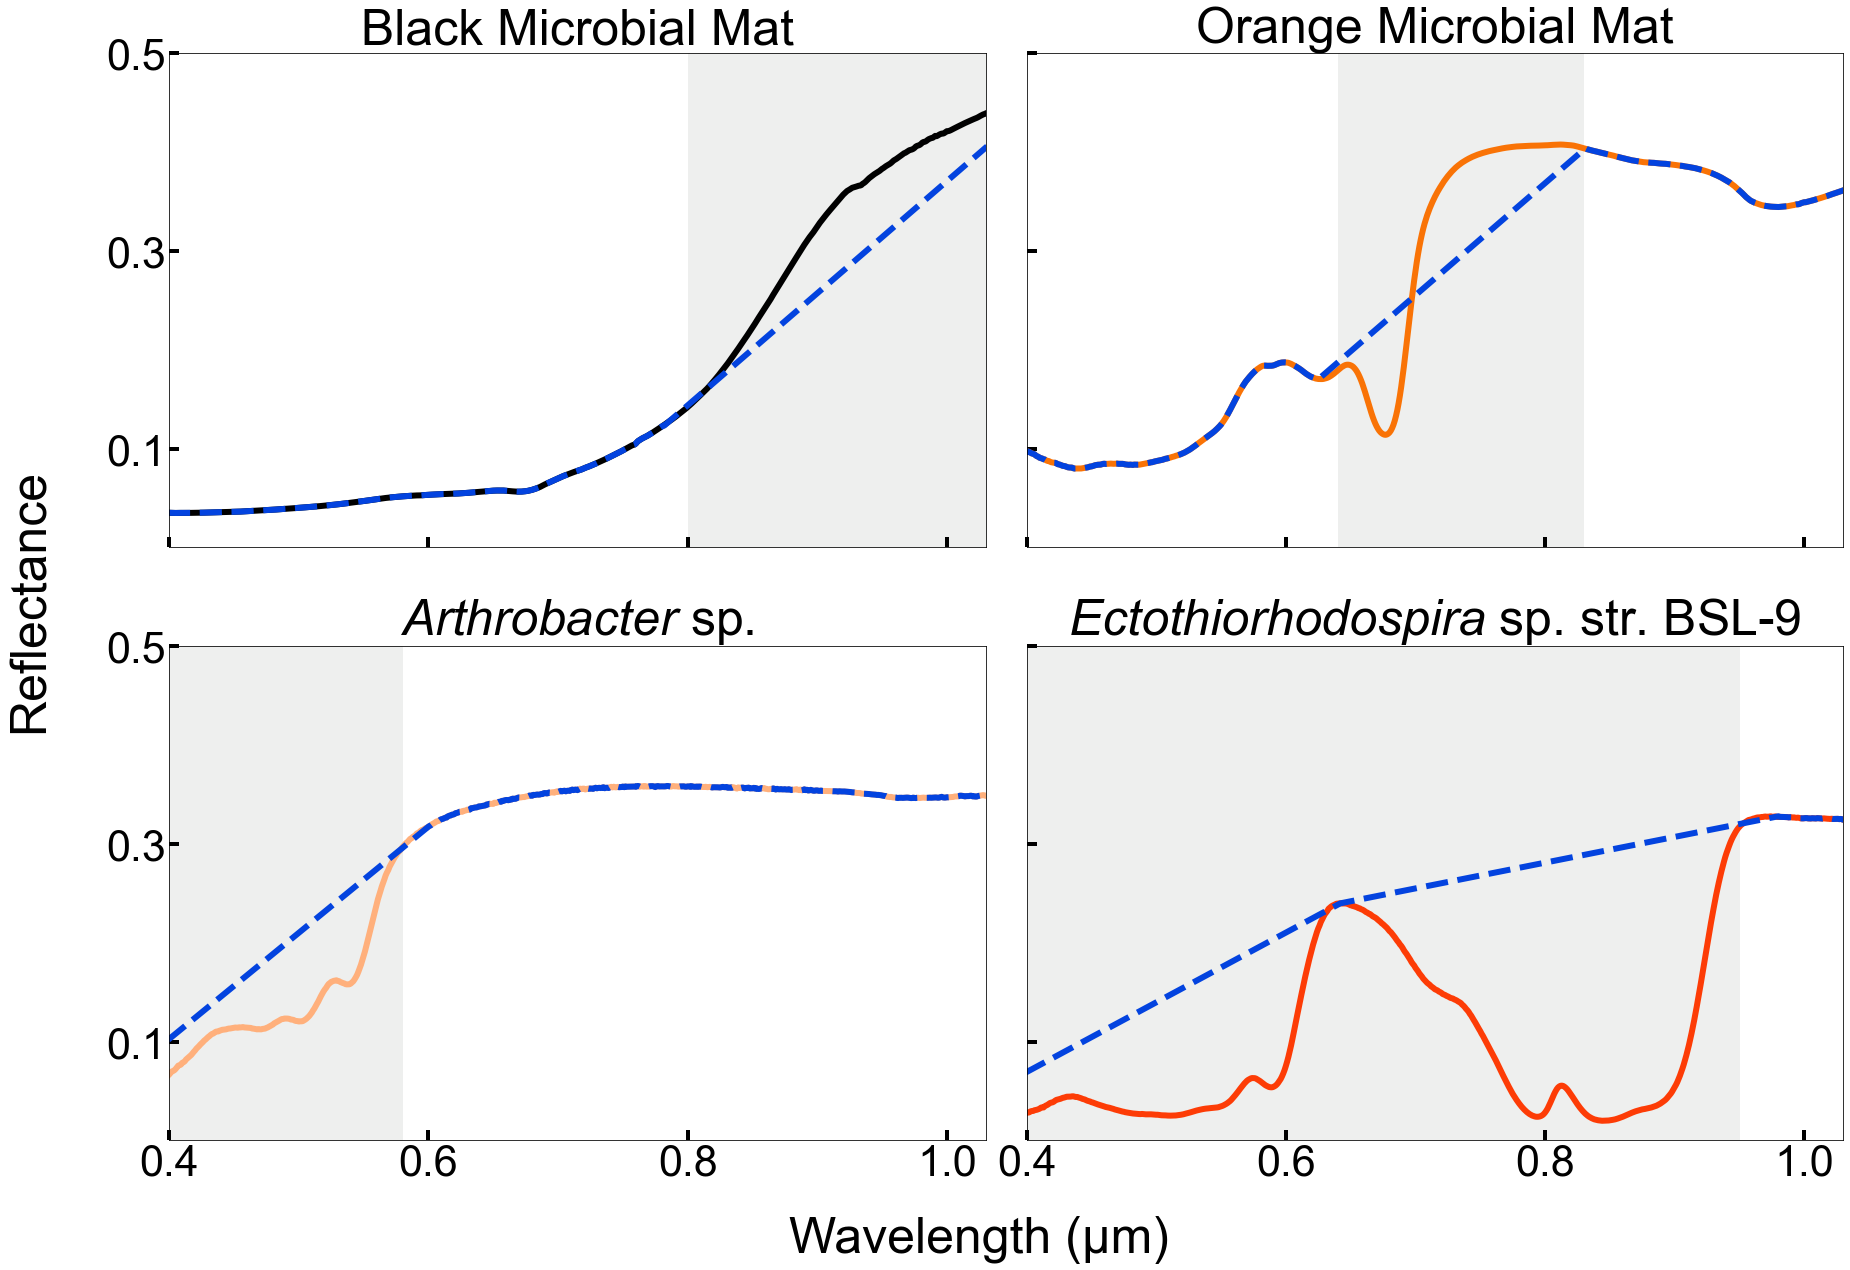

In [159]:
#Replot fig 4
#Biological and abiologic surface spectra

font = {'fontname':'Arial'}
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.it']= 'Arial:italic'
plt.rcParams['mathtext.cal']= 'Arial:italic'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams["mathtext.fontset"] = 'custom'

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30, 20)
fig.set_facecolor('white')
plt.subplots_adjust(hspace=0.2, wspace=0.05)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.04, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)
xlim=(0.4,1.030)
ylim=(0,0.5)
plt.setp(axs, xlim=xlim, ylim=ylim)
legparams = font_manager.FontProperties(family = 'Arial', size = 40)


# Black mat
axs[0,0].plot(wavelength, black.columns[1], 'xkcd:black',linewidth=6, label = 'Biotic')
axs[0,0].plot(wavelength, bscrub.columns[1], 'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
#axs[0,0].set_title('a.', fontsize = 50, **font, x = 0.08, y = 1.03)
axs[0,0].set_title('Black Microbial Mat', fontsize = 50, **font)
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].axvspan(xmin=0.8, xmax=1.03, facecolor='xkcd:grey', alpha=0.15)
axs[0,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[0,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])

# Orange mat
axs[0,1].plot(wavelength, orange.columns[1], 'xkcd:orange',linewidth=6, label = 'Biotic')
axs[0,1].plot(wavelength, oscrub.columns[1], 'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
#axs[0,1].set_title('b.', fontsize = 50, **font, x = 0.1, y = 1.03)
axs[0,1].set_title('Orange Microbial Mat', fontsize = 50, **font)
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].axvspan(xmin=0.64, xmax=0.83, facecolor='xkcd:grey', alpha=0.15)
axs[0,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[0,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])

# Arthrobacter
axs[1,0].plot(wavelength, arthro.columns[1], 'xkcd:peach',linewidth=6, label = 'Biotic')
axs[1,0].plot(wavelength, ascrub2.columns[1], 'xkcd:blue',linewidth=6, ls= 'dashed', label = 'Abiotic')
#axs[1,0].set_title('c.', fontsize = 50, **font, x = 0.08, y = 1.03)
axs[1,0].set_title('$\it{Arthrobacter}$ sp.', fontsize = 50, **font)
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].axvspan(xmin=0.35, xmax=0.58, facecolor='xkcd:grey', alpha=0.15)
axs[1,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[1,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")

# Ectothiorhodospira
axs[1,1].plot(wavelength, ecto.columns[1], 'xkcd:red orange',linewidth=6, label = 'Biotic')
axs[1,1].plot(wavelength, escrub.columns[1], 'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
#axs[1,1].set_title('d.', fontsize = 50, **font, x = 0.1, y = 1.03)
axs[1,1].set_title('$\it{Ectothiorhodospira}$ sp. str. BSL-9', fontsize = 50, **font)
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].axvspan(xmin=0.4, xmax=0.95, facecolor='xkcd:grey', alpha=0.15)
axs[1,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[1,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])

plt.savefig('/Users/schuylerraeschroerborges/Downloads/Figure4.tif', format='tif')